In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

In [2]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

In [3]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [4]:
# Read in data into a dataframe 
data = pd.read_csv('train-missings.csv')

# Display top of dataframe
data.head()

,Id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
0,1,2596.0,NaN,3.0,NaN,0.0,NaN,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,NaN,NaN,6225.0,1.0,0.0,0.0,5
2,3,2804.0,NaN,9.0,268.0,65.0,3180.0,NaN,238.0,NaN,6121.0,NaN,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,NaN,0.0,2
4,5,2595.0,45.0,NaN,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 15 columns):
Id        15120 non-null int64
p1        12156 non-null float64
p2        12188 non-null float64
p3        12096 non-null float64
p4        12071 non-null float64
p5        12083 non-null float64
p6        12057 non-null float64
p7        12151 non-null float64
p8        12035 non-null float64
p9        12073 non-null float64
p10       12152 non-null float64
p11       12031 non-null float64
p12       12031 non-null float64
p13       12198 non-null float64
target    15120 non-null int64
dtypes: float64(13), int64(2)
memory usage: 1.7 MB


In [6]:
data=data.drop("Id",axis=1)
data.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
count,12156.000000,12188.000000,12096.000000,12071.000000,12083.000000,12057.000000,12151.000000,12035.000000,12073.000000,12152.000000,12031.000000,12031.000000,12198.000000,15120.000000
mean,2746.864676,155.722432,16.525132,226.259796,50.931226,1704.409969,212.594272,219.061903,135.032966,1511.744651,0.239631,0.032250,0.418675,4.000000
std,417.908441,109.820171,8.459560,208.777715,61.161804,1319.590597,30.485857,22.797792,45.789227,1098.104397,0.426876,0.176671,0.493362,2.000066
min,1879.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2371.000000,64.000000,10.000000,67.000000,5.000000,755.000000,196.000000,207.000000,106.000000,726.000000,0.000000,0.000000,0.000000,2.000000
50%,2751.000000,125.000000,15.000000,180.000000,32.000000,1307.000000,220.000000,223.000000,138.000000,1262.500000,0.000000,0.000000,0.000000,4.000000
75%,3101.000000,259.000000,22.000000,324.000000,79.000000,2256.000000,235.000000,236.000000,167.000000,1989.000000,0.000000,0.000000,1.000000,6.000000
max,3849.000000,360.000000,52.000000,1318.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data)

Your selected dataframe has 14 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
p11,3089,20.4
p12,3089,20.4
p8,3085,20.4
p6,3063,20.3
p4,3049,20.2
p9,3047,20.2
p5,3037,20.1
p3,3024,20.0
p7,2969,19.6
p10,2968,19.6


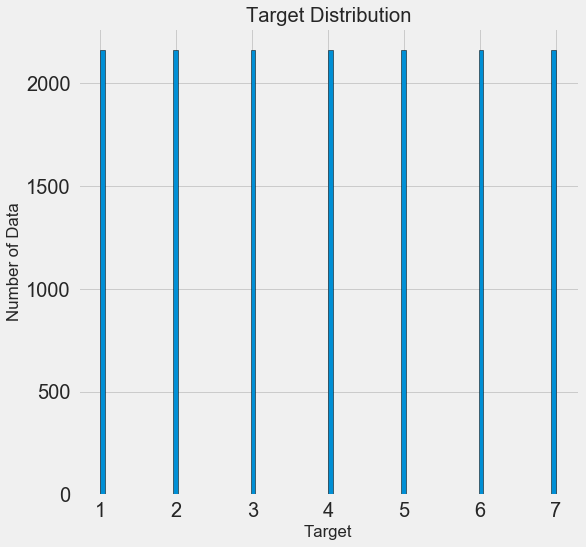

In [9]:
figsize(8, 8)

# Histogram of the target
plt.style.use('fivethirtyeight')
plt.hist(data['target'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Target'); plt.ylabel('Number of Data'); 
plt.title('Target Distribution');

count    12156.000000
mean      2746.864676
std        417.908441
min       1879.000000
25%       2371.000000
50%       2751.000000
75%       3101.000000
max       3849.000000
Name: p1, dtype: float64

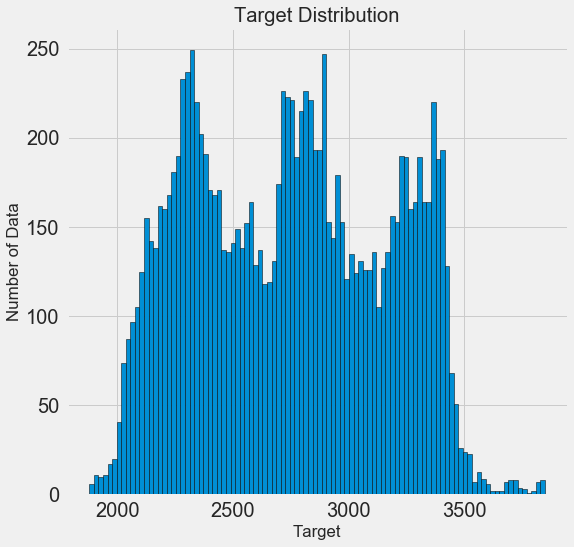

In [10]:
plt.style.use('fivethirtyeight')
plt.hist(data['p1'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Target'); plt.ylabel('Number of Data'); 
plt.title('Target Distribution');

data['p1'].describe()

In [11]:
# cols=['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13']
# first_quartile=[0 for col in cols]
# third_quartile=[0 for col in cols]
# iqr=[0 for col in cols]

# for i in range(len(cols)):
#     # Calculate first and third quartile
#     first_quartile[i] = data[cols[i]].describe()['25%']
#     third_quartile[i] = data[cols[i]].describe()['75%']

#     # Interquartile range
#     iqr[i] = third_quartile[i] - first_quartile[i]
    
#     print('Delete','p%s'%(i+1),first_quartile[i] - 3 * iqr[i],third_quartile[i] + 3 * iqr[i])
    
#     # Remove outliers
#     data = data[(data[cols[i]] > (first_quartile[i] - 3 * iqr[i])) &
#                 (data[cols[i]] < (third_quartile[i] + 3 * iqr[i]))]

In [20]:
# Find all correlations and sort 
correlations_data = data.corr()['target'].sort_values()

print(correlations_data, '\n')

p11      -0.237316
p6       -0.104968
p8       -0.094755
p10      -0.087357
p9       -0.059910
p7       -0.013471
p4       -0.007298
p12       0.007603
p2        0.013291
p1        0.018646
p5        0.072837
p3        0.084358
p13       0.118785
target    1.000000
Name: target, dtype: float64 



In [25]:
# Select the numeric columns
numeric_subset = data

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'target':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['p1', 'p2']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['target'])

# Find correlations with the score 
correlations = features.corr()['target'].dropna().sort_values()

C:\Users\Kourosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kourosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Kourosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [26]:
correlations

sqrt_p11   -0.237316
p11        -0.237316
p6         -0.104968
p8         -0.094755
sqrt_p8    -0.094421
log_p8     -0.093844
p10        -0.087357
sqrt_p6    -0.087323
sqrt_p10   -0.072226
log_p6     -0.066032
sqrt_p9    -0.063897
log_p9     -0.061268
p9         -0.059910
log_p10    -0.051907
log_p4     -0.036798
sqrt_p4    -0.031573
sqrt_p7    -0.013626
p7         -0.013471
log_p7     -0.011837
p4         -0.007298
log_p1      0.000041
log_p2      0.007169
sqrt_p2     0.007491
p12         0.007603
sqrt_p12    0.007603
sqrt_p1     0.009045
p2          0.013291
p2          0.013291
p1          0.018646
p1          0.018646
sqrt_p5     0.048969
log_p5      0.065723
p5          0.072837
p3          0.084358
sqrt_p3     0.089375
log_p3      0.090295
p13         0.118785
sqrt_p13    0.118785
target      1.000000
Name: target, dtype: float64